In [3]:
import numpy as np
import src.utils as utils
import sempler

import src.utils as utils

import src.jci_pc
import gnies

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


## Test JCI-PC

In [2]:
directory = "synthetic_experiments/dataset_1657282816_runs:1_seed:42_G:1_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:3_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:100000/"

In [3]:
data = utils.load_bin(directory + 'test_case_n:100000_g:0_r:0')

In [4]:
p = data[0].shape[1]
estimate, Is, estimated_cpdag = src.jci_pc.fit(data, 1e-2)

[[0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]]


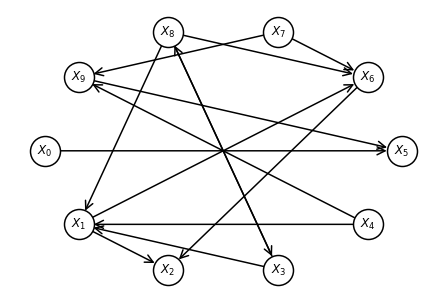

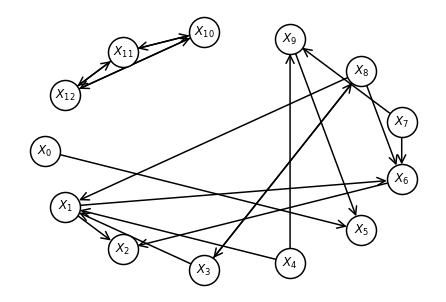

set()

In [5]:
sempler.utils.plot_graph(estimate)
sempler.utils.plot_graph(estimated_cpdag)
Is

In [6]:
test_cases = utils.read_pickle(directory + 'test_cases.pickle')
scm,I = test_cases['cases'][0]
print(I)

[{'noise_interventions': {0: (0.0, 7.194392198760262)}}, {'noise_interventions': {7: (0.0, 8.486840145296819)}}, {'noise_interventions': {6: (0.0, 9.87811175818378)}}]


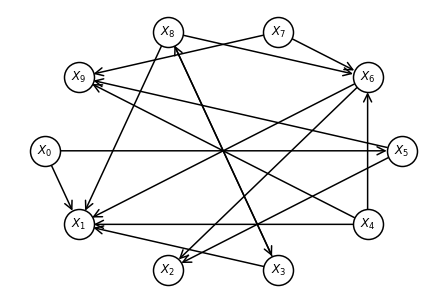

In [7]:
true_icpdag = gnies.utils.dag_to_icpdag(scm.W, {0,6,7})
sempler.utils.plot_graph(true_icpdag)

## Check that UT-IGSP+ works

In [ ]:
directory = "synthetic_experiments/dataset_1657195197_runs:1_seed:42_G:1_k:2.7_p:6_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:3_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:1000/"

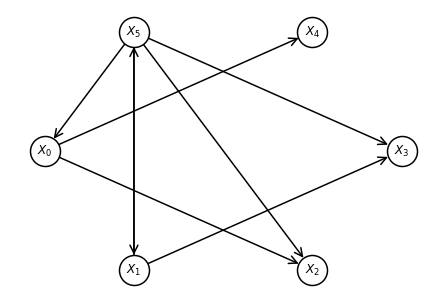

{0, 3, 4}


In [9]:
_, results = utils.read_pickle(directory + "compiled_results_ut_igsp_plus.pickle")
sempler.utils.plot_graph(results['estimates'][0,0,0,0,0])
print(results['I_estimates'][0,0,0,0,0])

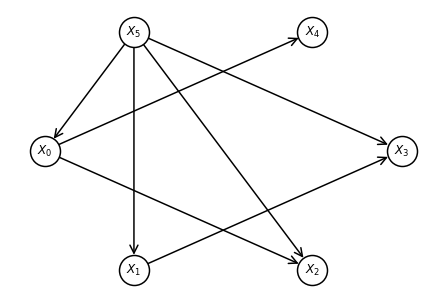

{0, 3, 4}


In [11]:
_, results = utils.read_pickle(directory + "compiled_results_ut_igsp.pickle")
A = results['estimates'][0,0,0,0,0]
I = results['I_estimates'][0,0,0,0,0]
sempler.utils.plot_graph(A)
print(I)

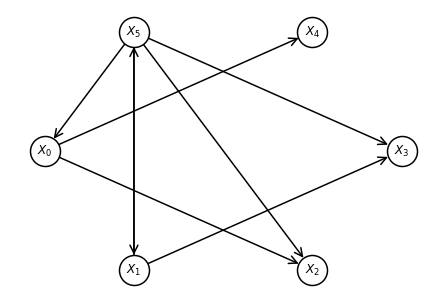

In [13]:
sempler.utils.plot_graph(gnies.utils.dag_to_icpdag(A, I))